In [1]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

# Importing data 

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

# Exploring Data: Missing Values

In [3]:
# make a list of the variables that contain missing values
vars_na = [var for var in df.columns if df[var].isnull().sum()>1]
# Print variable name and % missing
vars_na
# There is no missing data

[]

# Exploring Data: Numerical Values

In [5]:
num_var = [var for var in df.columns if df[var].dtypes !='O']

In [6]:
df[num_var]

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


# Exploring Data: Years Variables

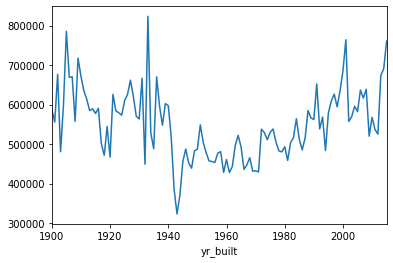

In [7]:
df.groupby('yr_built')['price'].mean().plot()

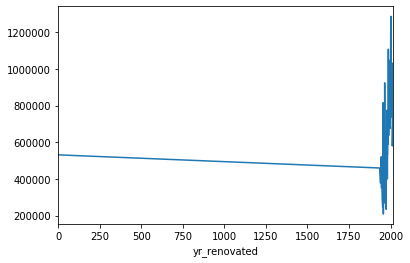

In [8]:
df.groupby('yr_renovated')['price'].mean().plot()

In [12]:
years_var = [var for var in num_var if 'yr' in var]
years_var

['yr_built', 'yr_renovated']

In [13]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [14]:
discrete_var = [var for var in num_var if len(df[var].unique())<20 and var not in years_var+['id']]

In [15]:
discrete_var

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

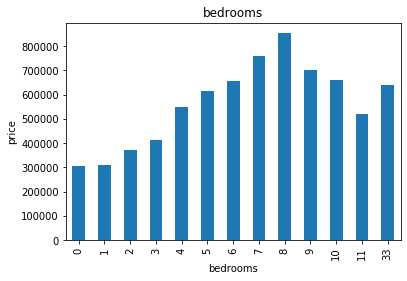

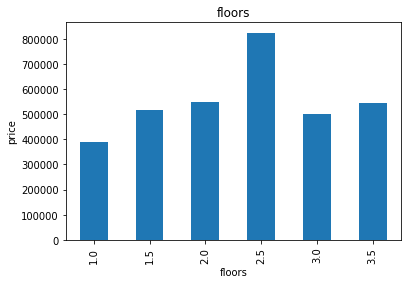

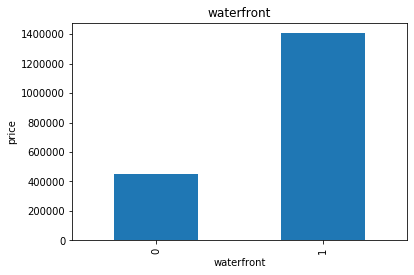

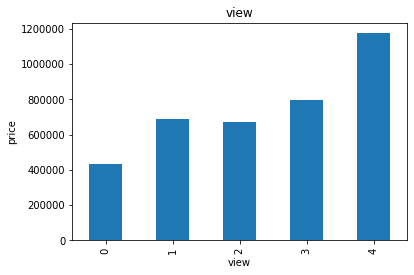

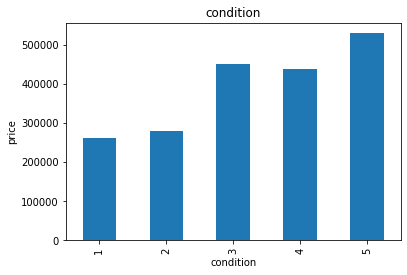

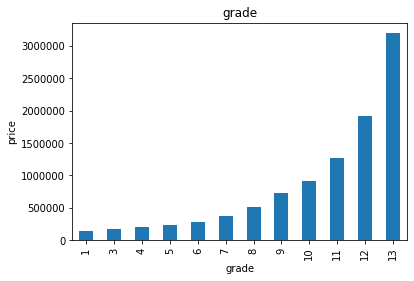

In [17]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var in discrete_var:
    analyse_discrete(df, var)

# Exploring Data: Continous Variables

In [19]:
cont_var = [var for var in num_var if var not in discrete_var+years_var]

In [20]:
cont_var

['Unnamed: 0',
 'id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

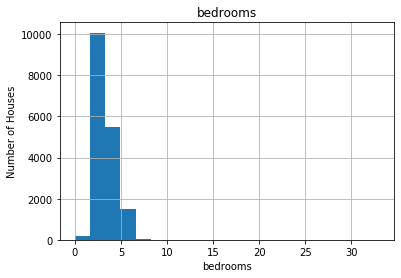

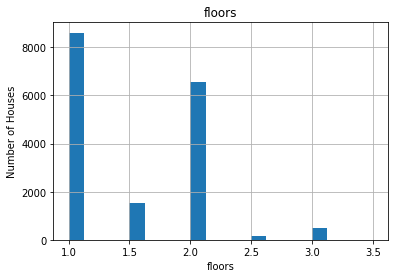

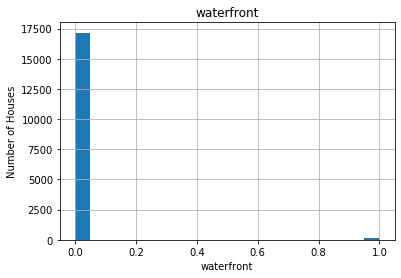

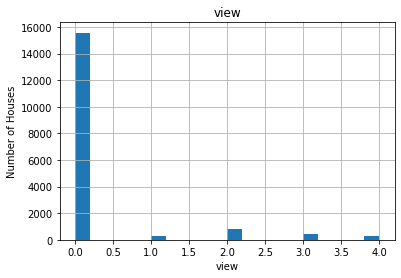

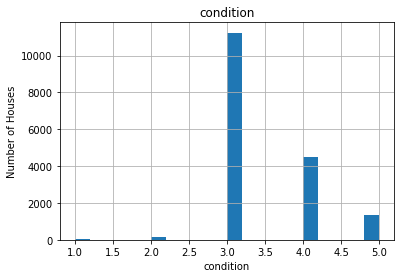

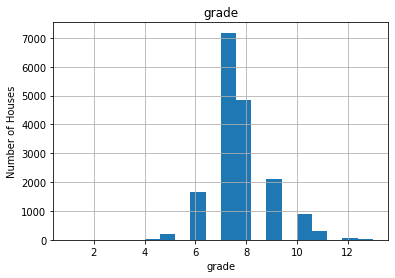

In [25]:
def analyse_cont(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.xlabel(var)
    plt.title(var)
    plt.ylabel('Number of Houses')
    plt.show()
    
for var in discrete_var:
    analyse_cont(df, var)

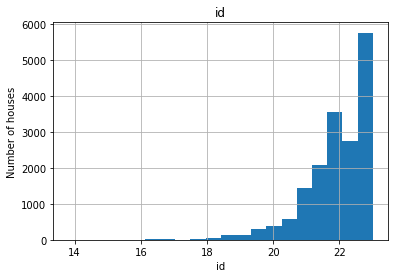

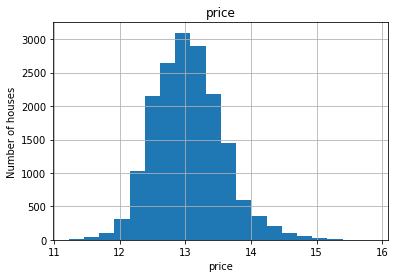

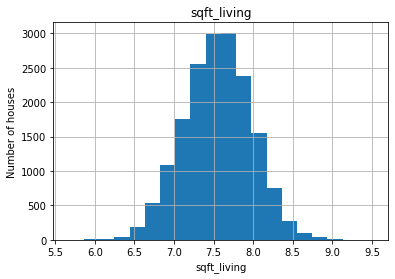

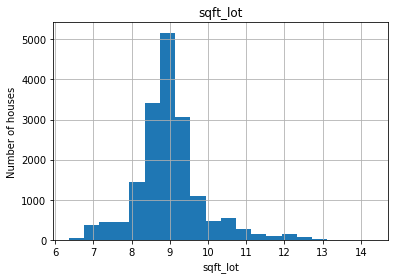

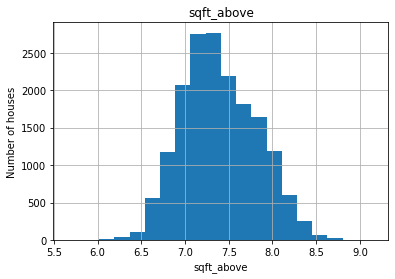

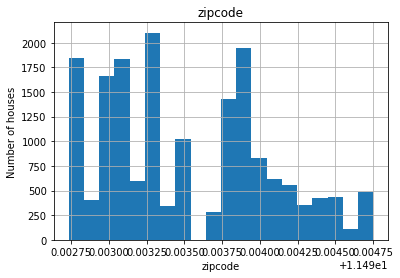

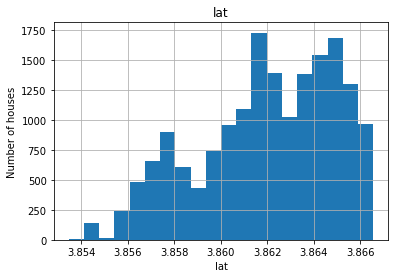

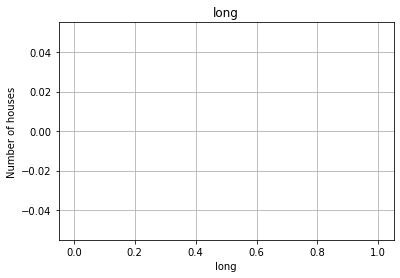

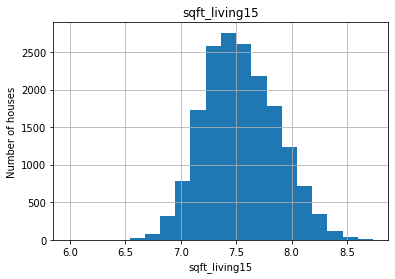

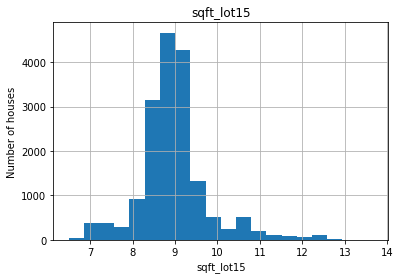

In [26]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_var:
    analyse_transformed_continous(df, var)

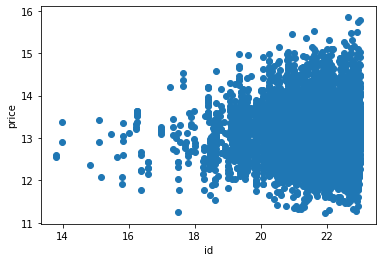

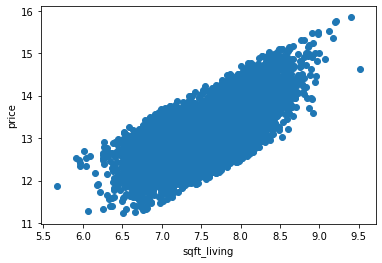

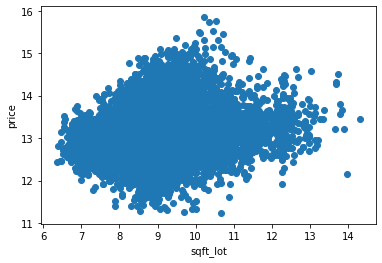

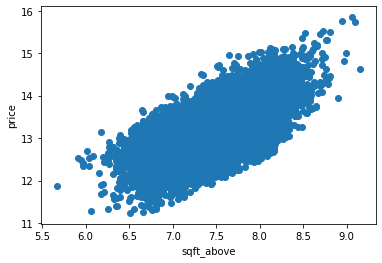

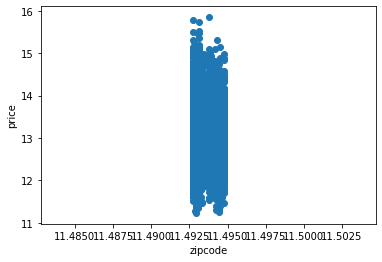

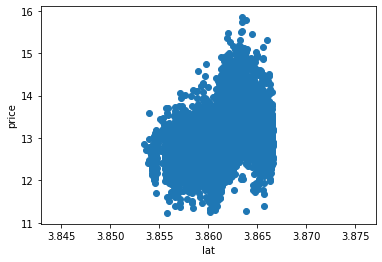

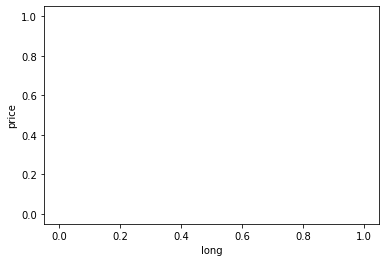

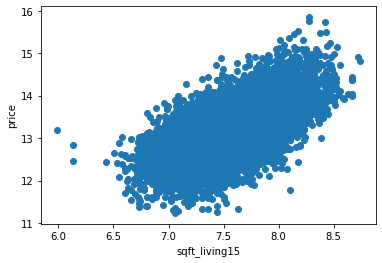

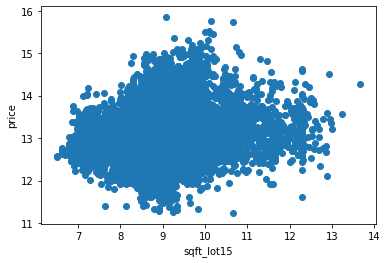

In [29]:
# let's explore the relationship between the house price and the transformed variables
# with more detail
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['price'] = np.log(df['price'])
        plt.scatter(df[var], df['price'])
        plt.ylabel('price')
        plt.xlabel(var)
        plt.show()
    
for var in cont_var:
    if var !='price':
        transform_analyse_continous(df, var)

# Exploring Data: Outliers

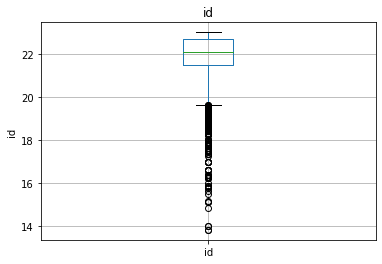

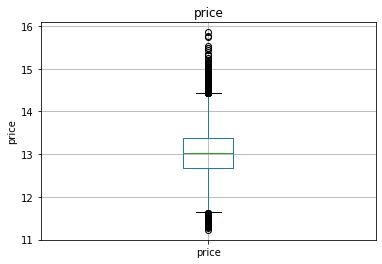

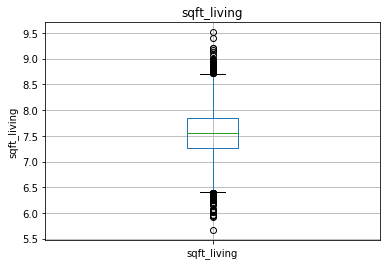

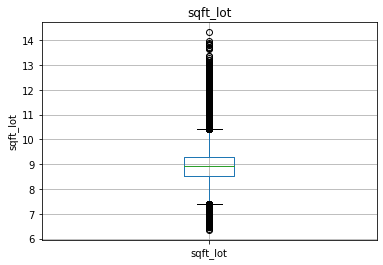

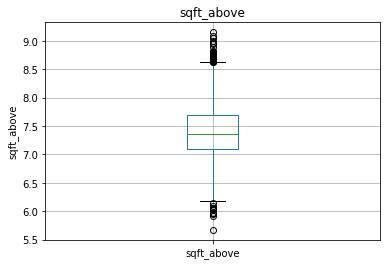

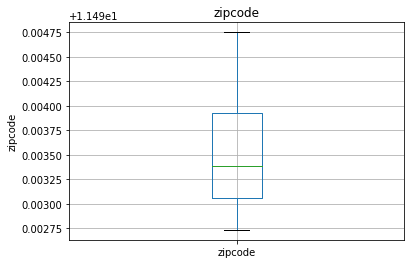

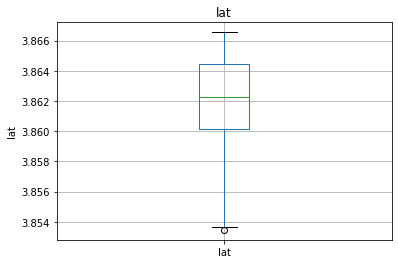

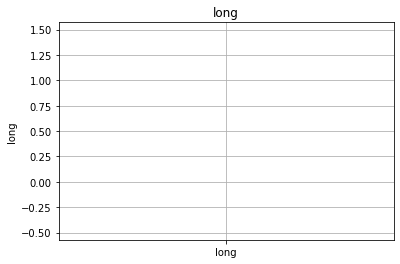

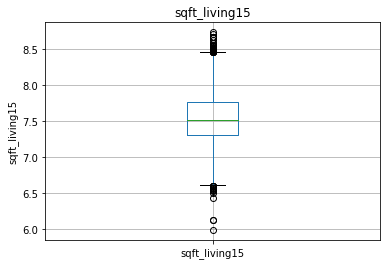

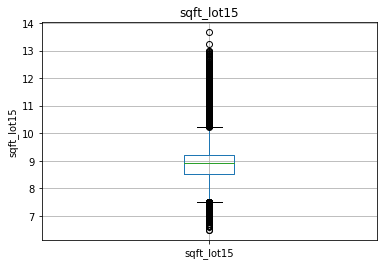

In [30]:
def outliers(df, var):
    df=df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var]=np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
for var in cont_var:
    outliers(df, var)

# Exploring Data: Categorical Values

In [35]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [106]:
df['yr_built'] = df["yr_built"].astype(str)

In [4]:
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

In [5]:
df['yr_old'] =  df['yr_built'].map(lambda x: 2020-x.year )

In [6]:
#df.yr_renovated = df.yr_renovated.astype(str)